**Варіант 5**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23,

24, 25, 26, 27

2) Вивести останні 8 рядків набору даних.

In [29]:
import csv

with open('NationalNames.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)
    for line in lines[-8:]:
      print(line)

['1825426', 'Zo', '2014', 'M', '5']
['1825427', 'Zyeir', '2014', 'M', '5']
['1825428', 'Zyel', '2014', 'M', '5']
['1825429', 'Zykeem', '2014', 'M', '5']
['1825430', 'Zymeer', '2014', 'M', '5']
['1825431', 'Zymiere', '2014', 'M', '5']
['1825432', 'Zyran', '2014', 'M', '5']
['1825433', 'Zyrin', '2014', 'M', '5']


4) Отримайте загальну інформацію про дані у наборі даних.

In [12]:
df = pd.read_csv('NationalNames.csv')

print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому
наборі даних

In [68]:
with open("NationalNames.csv", "r") as csvfile:

    # Створення читача CSV
    reader = csv.reader(csvfile, delimiter=",")

    # Пропуск заголовка
    next(reader, None)
    
    females = set()
    males = set()
    
    # Отримання рядків з CSV-файлу
    for row in reader:

        # Ім'я
        name = row[1]

        # Стать
        gender = row[3]

        # Додавання імені до відповідного словника
        if gender == "F":
            females.add(name)
        elif gender == "M":
            males.add(name)
                      
    print(len(females))
    print(len(males))

64911
39199


7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [40]:
# Словник для зберігання імен та їх частоти
male_names = {}

# Відкриття CSV-файлу
with open("NationalNames.csv", "r") as csvfile:

    # Створення читача CSV
    reader = csv.reader(csvfile, delimiter=",")

    # Пропуск заголовка
    next(reader, None)

    # Отримання рядків з CSV-файлу
    for row in reader:

        # Ім'я
        name = row[1].lower()

        # Стать
        gender = row[3].lower()

        # Рік
        year = int(row[2])

        # Перевірка, чи чоловіча стать і 2010 рік
        if gender == "m" and year == 2010:
            male_names.setdefault(name, 0)
            male_names[name] += 1

# Сортування словника за частотою
sorted_names = sorted(male_names.items(), key=lambda x: x[1], reverse=True)

# Виведення 5 найпопулярніших імен
print("5 найпопулярніших чоловічих імен у 2010 році:")
print(len(male_names))
for i, (name, count) in enumerate(sorted_names[:5], 1):
    print(i, name, count)

5 найпопулярніших чоловічих імен у 2010 році:
14241
1 jacob 1
2 ethan 1
3 michael 1
4 jayden 1
5 william 1


9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [3]:
df = pd.read_csv("NationalNames.csv")
print(df[df['Count'] == df['Count'].min()].shape[0])

254615


10. Підрахуйте кількість унікальних імен у кожному році

In [42]:
df = pd.read_csv("NationalNames.csv")
print(df.groupby('Year')['Name'].nunique())

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


15. Знайдіть загальну кількість народжень за рік.

In [43]:
df = pd.read_csv("NationalNames.csv")
print(df.groupby('Year')['Count'].sum())

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


16. Знайдіть рік, коли народилося найбільше дітей

In [4]:
df = pd.read_csv("NationalNames.csv")
max_val = df.groupby('Year')['Count'].sum().idxmax()
print(f"Res: {max_val}")

Res: 1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного
року

In [66]:
df = pd.read_csv("NationalNames.csv")
res = df.groupby(['Year', 'Gender'])['Count'].sum()
print(f"Res: {res}")

Res: Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
                 ...   
2012  M         1889414
2013  F         1745339
      M         1881463
2014  F         1768775
      M         1901376
Name: Count, Length: 270, dtype: int64


18. Підрахуйте кількість років, коли дівчаток народжувалось більше,
ніж хлопчиків.

In [75]:
df = pd.read_csv("NationalNames.csv")
female_per_year = df[df['Gender'] == 'F'].groupby('Year')['Count'].sum()
male_per_year = df[df['Gender'] == 'M'].groupby('Year')['Count'].sum()
print(female_per_year)
print(len(female_per_year[female_per_year > male_per_year].index.tolist()))

Year
1880      90993
1881      91954
1882     107850
1883     112321
1884     129022
         ...   
2010    1772738
2011    1753500
2012    1753922
2013    1745339
2014    1768775
Name: Count, Length: 135, dtype: int64
54


20. Підрахуйте кількість гендерно-нейтральних імен (однакових для
дівчат та хлопців)

In [87]:
df = pd.read_csv("NationalNames.csv")
females = set(df[df['Gender'] == 'F']['Name'])
males = set(df[df['Gender'] == 'M']['Name'])
print(len(females.intersection(males)))

10221


21. Порахуйте, скільки разів хлопчиків називали Barbara

In [88]:
males = df[df['Gender'] == 'M'].groupby(['Name'])['Count'].sum()
print(males['Barbara'])

4139


22. Підрахуйте скільки років проводилось спостереження

In [89]:
print(df['Year'].nunique())

135


23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні
кожного року)

In [25]:
df = pd.read_csv("NationalNames.csv")
# Filter for shared names
male_names = set(df[df['Gender'] == 'M']['Name'])
female_names = set(df[df['Gender'] == 'F']['Name'])
shared_names = male_names.intersection(female_names)

shared_df = df[df['Name'].isin(shared_names)]
name_presence = shared_df.groupby(['Year', 'Name']).size().unstack()
print(name_presence)
df_cleaned = name_presence.dropna(axis=1)
print(df_cleaned.keys())

Name  Aaden  Aadi  Aadyn  Aalijah  Aaliyah  Aamari  Aamir  Aaren  Aareon  \
Year                                                                       
1880    NaN   NaN    NaN      NaN      NaN     NaN    NaN    NaN     NaN   
1881    NaN   NaN    NaN      NaN      NaN     NaN    NaN    NaN     NaN   
1882    NaN   NaN    NaN      NaN      NaN     NaN    NaN    NaN     NaN   
1883    NaN   NaN    NaN      NaN      NaN     NaN    NaN    NaN     NaN   
1884    NaN   NaN    NaN      NaN      NaN     NaN    NaN    NaN     NaN   
...     ...   ...    ...      ...      ...     ...    ...    ...     ...   
2010    1.0   1.0    1.0      1.0      2.0     2.0    1.0    2.0     1.0   
2011    1.0   1.0    1.0      2.0      1.0     2.0    1.0    1.0     NaN   
2012    1.0   2.0    1.0      2.0      2.0     1.0    1.0    1.0     NaN   
2013    1.0   2.0    1.0      2.0      2.0     2.0    2.0    1.0     NaN   
2014    1.0   1.0    1.0      2.0      2.0     2.0    1.0    1.0     NaN   

Name  Aaria

24. Знайти найпопулярніше серед непопулярних імен (непопулярне
ім’я, яким називали дітей найбільшу кількість разів )

Оскільки незрозуміло, за яким критерієм визначається непопулярне ім'я (раніше популярність визначалась за значенням Count) та чим популярність відрізняється від кількості названих цим ім'ям дітей, я зроблю припущення, що малась на увазі кількість років, в яких з'являлось це ім'я. 

Перевразую тз: Знайдіть ім'я, яке має найменшу суму значень Count (непопулярне) і з'являється найбільшій кількість років(найпопулярніше з непопулярних).

In [57]:
df = pd.read_csv("NationalNames.csv")

count_sum = df.groupby('Name')['Count'].sum().sort_values()
print(count_sum)

min_value = count_sum.min()
names_with_min_value = count_sum[count_sum == min_value].index.to_numpy()

print(names_with_min_value)

not_popular = df[df['Name'].isin(names_with_min_value)]
popular_not_popular = not_popular.groupby('Name')['Year'].nunique()
print('\npopular_not_popular')
print(popular_not_popular)

the_most_popular = popular_not_popular.idxmax()
print(max_index)

Name
Zzyzx               5
Nevaehia            5
Crettie             5
Nevaehtnes          5
Nevara              5
               ...   
Mary          4130441
Michael       4330805
Robert        4816785
John          5106590
James         5129096
Name: Count, Length: 93889, dtype: int64
['Zzyzx' 'Nevaehia' 'Crettie' ... 'Antowain' 'Ahkil' 'Yetzaly']

popular_not_popular
Name
Aabid        1
Aadhyan      1
Aadian       1
Aadrian      1
Aadrit       1
            ..
Zysean       1
Zytaevius    1
Zytavion     1
Zyvion       1
Zzyzx        1
Name: Year, Length: 13393, dtype: int64
Aabid


25. Побудувати графіки розподілення кількості імен John та Mary по
роках без залежності до статі.

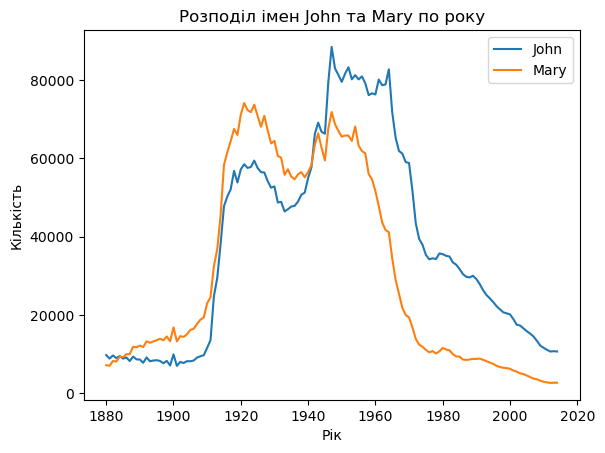

In [28]:
df = pd.read_csv("NationalNames.csv")

# Отримання даних для John та Mary
john_data = df[df["Name"] == "John"]
mary_data = df[df["Name"] == "Mary"]

# Групування даних по року
john_counts = john_data.groupby("Year")["Count"].sum()
mary_counts = mary_data.groupby("Year")["Count"].sum()

# Створення графіка
plt.plot(john_counts.index, john_counts, label="John")
plt.plot(mary_counts.index, mary_counts, label="Mary")

plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.title("Розподіл імен John та Mary по року")
plt.legend()
plt.show()

26. Побудувати графіки розподілення кількості жіночих імен John та
чоловічих імен Mary по роках.

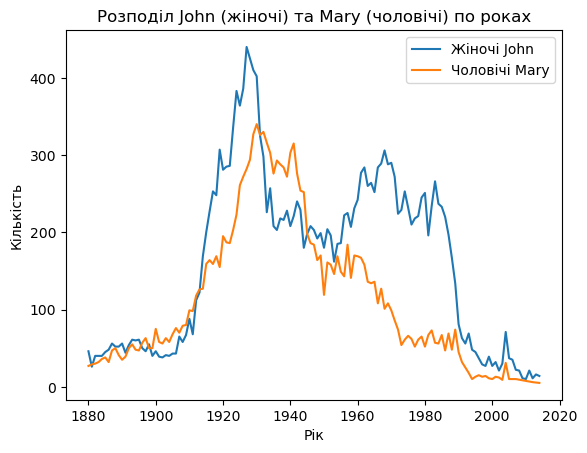

In [29]:
df = pd.read_csv("NationalNames.csv")
female_john_data = df[(df["Name"] == "John") & (df["Gender"] == "F")]
male_mary_data = df[(df["Name"] == "Mary") & (df["Gender"] == "M")]

# Групування даних по року
female_john_counts = female_john_data.groupby("Year")["Count"].sum()
male_mary_counts = male_mary_data.groupby("Year")["Count"].sum()

# Створення графіка
plt.plot(female_john_counts.index, female_john_counts, label="Жіночі John")
plt.plot(male_mary_counts.index, male_mary_counts, label="Чоловічі Mary")

plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.title("Розподіл John (жіночі) та Mary (чоловічі) по роках")
plt.legend()
plt.show()

27. Знайти найпопулярніші імена в кожному році.

In [31]:
df = pd.read_csv("NationalNames.csv")
highest_counts = df.groupby(['Year', 'Name'])['Count'].max().reset_index()

print(highest_counts)

highest_counts_per_year = highest_counts.groupby('Year').apply(
  lambda g: g[g['Count'] == g['Count'].max()]['Name'].tolist()).reset_index()

print(highest_counts_per_year.rename(columns={'Name': 'Highest Count Names'}))

         Year      Name  Count
0        1880     Aaron    102
1        1880        Ab      5
2        1880     Abbie     71
3        1880    Abbott      5
4        1880      Abby      6
...       ...       ...    ...
1664775  2014     Zyron     13
1664776  2014     Zyrus     10
1664777  2014   Zyshawn      6
1664778  2014  Zytaveon      7
1664779  2014     Zyyon      6

[1664780 rows x 3 columns]
     Year           0
0    1880      [John]
1    1881      [John]
2    1882      [John]
3    1883      [John]
4    1884      [John]
..    ...         ...
130  2010  [Isabella]
131  2011    [Sophia]
132  2012    [Sophia]
133  2013    [Sophia]
134  2014      [Emma]

[135 rows x 2 columns]
